In [30]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

query = "select * from sqlite_master where type='table';"
fb = pd.read_sql_query(query, conn)
fb

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [31]:
query_2 = "select * from facts limit 5;"
facts_5 = pd.read_sql_query(query_2, conn)
facts_5

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [32]:
query_3 = "select min(population), max(population), min(population_growth), max(population_growth) from facts;"
facts_q3 = pd.read_sql_query(query_3, conn)
facts_q3

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [33]:
query_4 = "select * from facts where population = (select min(population) from facts);"
facts_q4 = pd.read_sql_query(query_4, conn)
facts_q4

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [34]:
query_5 = "select * from facts where population = (select max(population) from facts);"
facts_q5 = pd.read_sql_query(query_5, conn)
facts_q5

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


Antarctica has zero population
The world has 7.2 billion people

In [35]:
query_hist = "select population, population_growth, birth_rate, death_rate from facts;"
df_hist = pd.read_sql_query(query_hist, conn)
df_hist

,population,population_growth,birth_rate,death_rate
0,3.256434e+07,2.32,38.57,13.89
1,3.029278e+06,0.30,12.92,6.58
2,3.954217e+07,1.84,23.67,4.31
3,8.558000e+04,0.12,8.13,6.96
4,1.962535e+07,2.78,38.78,11.49
5,9.243600e+04,1.24,15.85,5.69
6,4.343189e+07,0.93,16.64,7.33
7,3.056382e+06,0.15,13.61,9.34
8,2.275101e+07,1.07,12.15,7.14
9,8.665550e+06,0.55,9.41,9.42


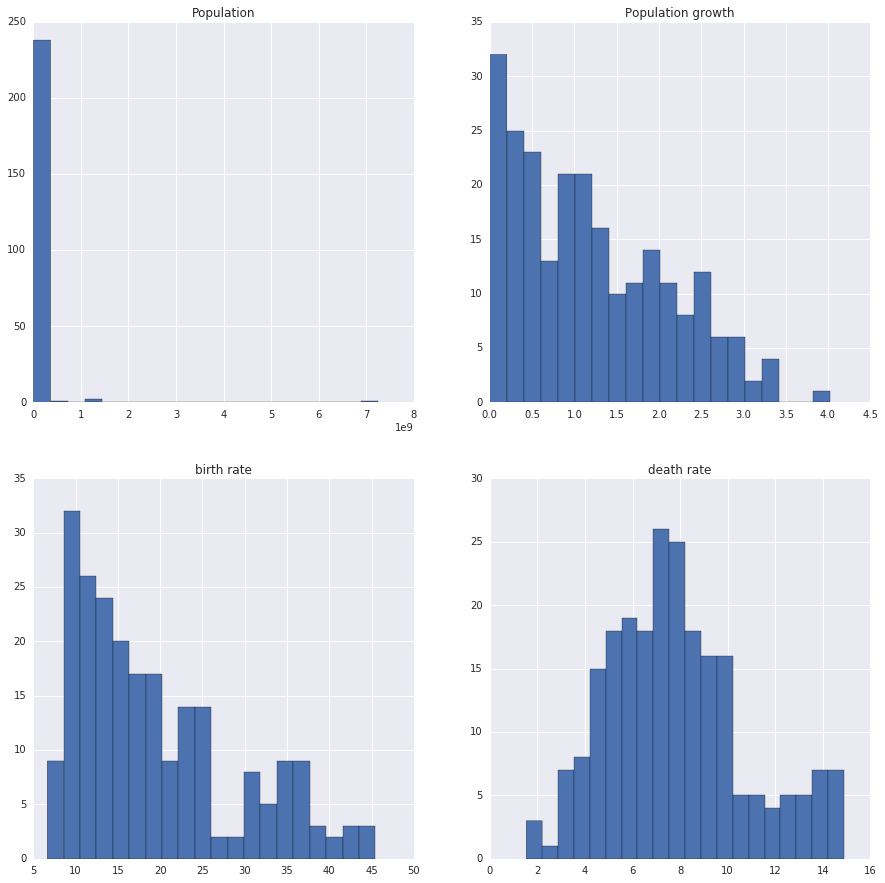

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
#f, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
#print(df_hist.head())
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

df_hist["population"].hist(ax=ax1, bins=20)
ax1.set_title('Population')

df_hist["population_growth"].hist(ax=ax2, bins=20)
ax2.set_title('Population growth')

df_hist["birth_rate"].hist(ax=ax3, bins=20)
ax3.set_title('birth rate')

df_hist["death_rate"].hist(ax=ax4, bins=20)
ax4.set_title('death rate')

plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


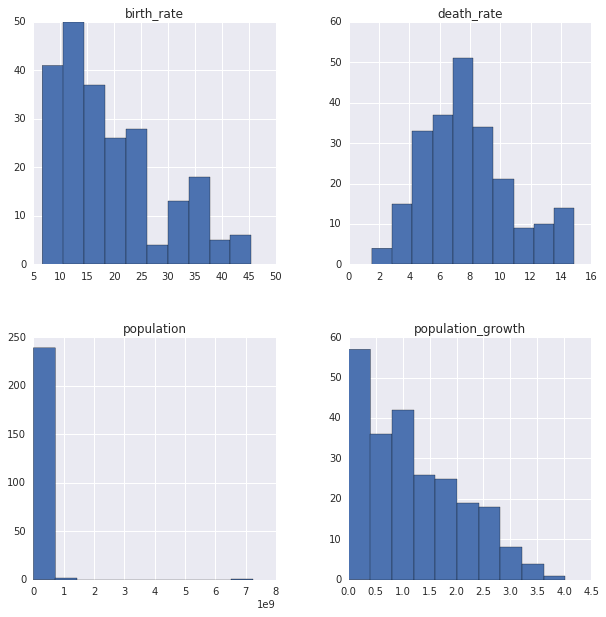

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
pd.read_sql_query(query_hist, conn).hist(ax = ax)
plt.show()

Above codes are another way to achieve the same histogram

In [38]:
query_density = "select name as country, population / area_land as population_density from facts order by population_density desc;"
df_density = pd.read_sql_query(query_density, conn)
df_density

,country,population_density
0,Macau,21168.0
1,Monaco,15267.0
2,Singapore,8259.0
3,Hong Kong,6655.0
4,Gaza Strip,5191.0
5,Gibraltar,4876.0
6,Bahrain,1771.0
7,Maldives,1319.0
8,Malta,1310.0
9,Bermuda,1299.0


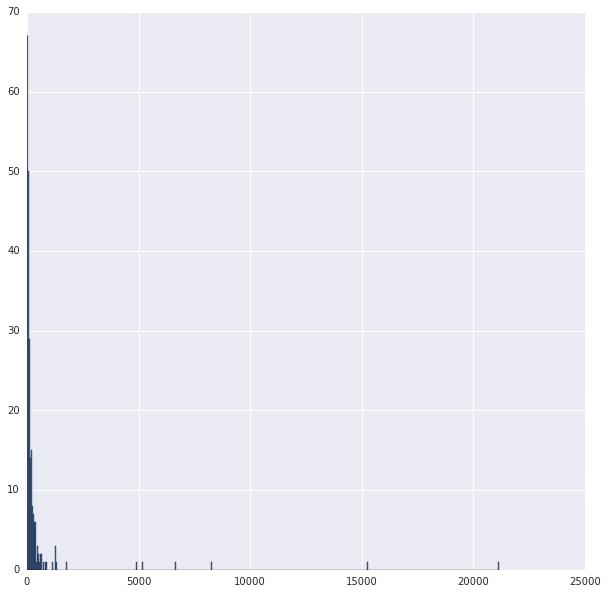

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
df_density['population_density'].hist(ax=ax, bins=500)
plt.show()

In [40]:
query_water = "select name as country, area_water / area_land as water_ratio from facts order by water_ratio desc;"
df_water = pd.read_sql_query(query_water, conn)
df_water

,country,water_ratio
0,British Indian Ocean Territory,905.0
1,Virgin Islands,4.0
2,Afghanistan,0.0
3,Albania,0.0
4,Algeria,0.0
5,Andorra,0.0
6,Angola,0.0
7,Antigua and Barbuda,0.0
8,Argentina,0.0
9,Armenia,0.0


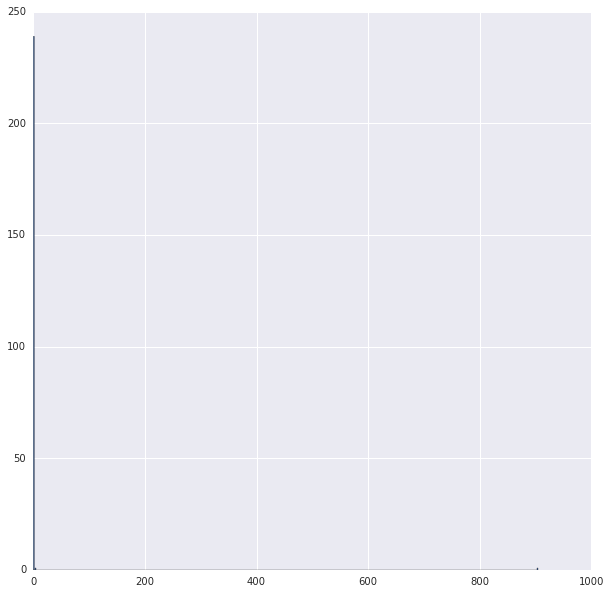

In [41]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
df_water['water_ratio'].hist(ax=ax, bins=500)
plt.show()